# (2주차) 9월14일 
>  Overview - 이미지분석(복습), 추천시스템, 텍스트분석, GAN 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-xHtq0dLejN4TbS5H9tbeEa

## imports

In [1]:
#
from fastai.vision.all import *  ## 이미지분석
from fastai.collab import * ## 추천시스템
from fastai.text.all import * ## 텍스트분석 
from fastai.vision.gan import * ## GAN (이미지생성)

In [2]:
import pandas as pd

## 이미지 자료분석 실습 (지난시간 복습)

### 1단계: 데이터의 정리

In [3]:
path = untar_data(URLs.PETS)/'images'

In [6]:
fnames = get_image_files(path)

In [29]:
?get_image_files

Signature: get_image_files(path, recurse=True, folders=None)
Docstring: Get image files in `path` recursively, only in `folders`, if specified.
File:      ~/anaconda3/envs/py37/lib/python3.7/site-packages/fastai/data/transforms.py
Type:      function


In [18]:
f = lambda fname: 'cat' if fname[0].isupper() else 'dog'

In [23]:
dls=ImageDataLoaders.from_name_func(
    path, 
    fnames,
    f,
    item_tfms = Resize(224))

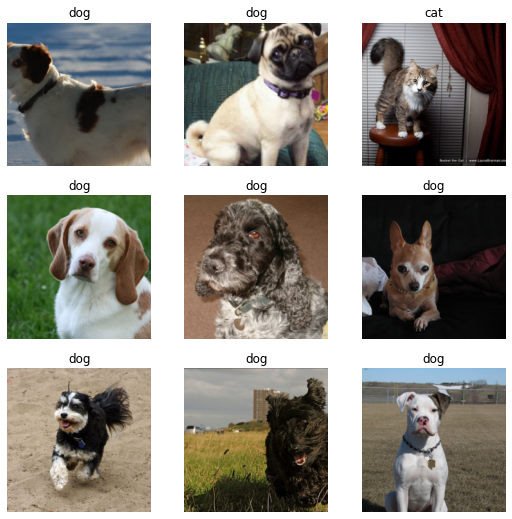

In [24]:
dls.show_batch()

### 2단계: lrnr 오브젝트 생성

In [30]:
lrnr = cnn_learner(dls,resnet34,metrics=error_rate) 

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### 3단계: lrnr.학습()

- fine_tune()은 모든 가중치를 학습하는 것이 아니라 일부만 학습하는 것임. 
- fine_tune()이외이 방법으로 학습할 수도 있음.

In [37]:
lrnr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.153413,0.019028,0.004060,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.055954,0.022035,0.008796,00:10


### 4단계: lrnr.예측()

(방법1) lrnr.predict() 함수를 이용

In [39]:
lrnr.predict('/home/cgb4/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_81.jpg')

('dog', TensorBase(1), TensorBase([0.0014, 0.9986]))

(방법2) lrnr.model(X) 를 이용: X의 shape이 (?,3,224,224)의 형태의 텐서이어야함

In [50]:
X,y = dls.one_batch()

In [68]:
lrnr.model(X[0:1])

TensorBase([[ 10.0084, -10.8716]], device='cuda:0', grad_fn=<AliasBackward0>)

- 0번 obs에 대한 결과 

## 프로그래밍 과정 

### 프로그래밍 과정 overview

`-` overview 

(1) `dls` 오브젝트 생성

(2) `lrnr` 오브젝트 생성 

(3) `lrnr.학습()` 

(4) `lrnr.예측()`

### 이미지분석, 추천시스템, 텍스트분석, GAN 분석과정 비교 

`-` 비교

| |이미지분석(CNN) | 추천시스템 | 텍스트분석 | GAN | 
|:-:|:-:|:-:|:-:|:-:|
|1단계|ImageDataLoaders|CollabDataLoaders| TextDataLoaders | DataBlock -> dls |  
|2단계|cnn_learner()|collab_learner()| language_model_learner() | GANLearner.wgan() | 
|3단계|lrnr.fine_tune(1)|lrnr.fit()| lrnr.fit() | lrnr.fit() |
|4단계|lrnr.predict(), lrnr.model(X)|lrnr.model(X)| lrnr.predict() | | 

## 추천시스템 실습

### 1단계

In [72]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_view.csv')
df_view

,커피1,커피2,커피3,커피4,커피5,커피6,커피7,커피8,커피9,커피10,홍차1,홍차2,홍차3,홍차4,홍차5,홍차6,홍차7,홍차8,홍차9,홍차10
0,4.149209,NaN,NaN,4.078139,4.033415,4.071871,NaN,NaN,NaN,NaN,1.142659,1.109452,NaN,0.603118,1.084308,NaN,0.906524,NaN,NaN,0.903826
1,4.031811,NaN,NaN,3.822704,NaN,NaN,NaN,4.071410,3.996206,NaN,NaN,0.839565,1.011315,NaN,1.120552,0.911340,NaN,0.860954,0.871482,NaN
2,4.082178,4.196436,NaN,3.956876,NaN,NaN,NaN,4.450931,3.972090,NaN,NaN,NaN,NaN,0.983838,NaN,0.918576,1.206796,0.913116,NaN,0.956194
3,NaN,4.000621,3.895570,NaN,3.838781,3.967183,NaN,NaN,NaN,4.105741,1.147554,NaN,1.346860,NaN,0.614099,1.297301,NaN,NaN,NaN,1.147545
4,NaN,NaN,NaN,NaN,3.888208,NaN,3.970330,3.979490,NaN,4.010982,NaN,0.920995,1.081111,0.999345,NaN,1.195183,NaN,0.818332,1.236331,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.511905,1.066144,NaN,1.315430,NaN,1.285778,NaN,0.678400,1.023020,0.886803,NaN,4.055996,NaN,NaN,4.156489,4.127622,NaN,NaN,NaN,NaN
96,NaN,1.035022,NaN,1.085834,NaN,0.812558,NaN,1.074543,NaN,0.852806,3.894772,NaN,4.071385,3.935935,NaN,NaN,3.989815,NaN,NaN,4.267142
97,NaN,1.115511,NaN,1.101395,0.878614,NaN,NaN,NaN,1.329319,NaN,4.125190,NaN,4.354638,3.811209,4.144648,NaN,NaN,4.116915,3.887823,NaN
98,NaN,0.850794,NaN,NaN,0.927884,0.669895,NaN,NaN,0.665429,1.387329,NaN,NaN,4.329404,4.111706,3.960197,NaN,NaN,NaN,3.725288,4.122072


- 컴퓨터가 좋아하는 데이터 타입은 아님

`-` 컴퓨터가 좋아하는 자료

In [79]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv')
df

,user,item,rating,item_name
0,1,15,1.084308,홍차5
1,1,1,4.149209,커피1
2,1,11,1.142659,홍차1
3,1,5,4.033415,커피5
4,1,4,4.078139,커피4
...,...,...,...,...
995,100,18,4.104276,홍차8
996,100,17,4.164773,홍차7
997,100,14,4.026915,홍차4
998,100,4,0.838720,커피4


`-` 유저와 아이템의 인덱스 정리 

In [96]:
df.user.unique(), df.item.unique()

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([15,  1, 11,  5,  4, 14,  6, 20, 12, 17,  8,  9, 13, 19, 18, 16,  2,
         3, 10,  7]))

- 유저는 1-100 까지 번호가 매겨짐 
- 아이템은 1-20 까지 번호가 매겨짐 

In [100]:
dls = CollabDataLoaders.from_df(df)

In [83]:
dls.show_batch()

,user,item,rating
0,11,17,0.960800
1,61,17,3.909415
2,31,2,4.050969
3,17,17,1.096392
4,62,9,0.742943
5,46,17,0.833476
6,12,2,3.812937
7,90,20,3.903833
8,64,5,1.328967
9,85,3,0.693932


In [86]:
X,y = dls.one_batch()

In [91]:
X[:10]

tensor([[64,  6],
        [86,  3],
        [84, 14],
        [42, 18],
        [49,  8],
        [15, 19],
        [53, 11],
        [13, 12],
        [74, 16],
        [25, 14]])

In [90]:
y[:5]

tensor([[0.9451],
        [0.8993],
        [4.0129],
        [0.7864],
        [3.7636]])

### 2단계 

In [102]:
lrnr = collab_learner(dls, y_range=(0,5))

### 3단계

In [114]:
lrnr.fit(10)

epoch,train_loss,valid_loss,time
0,0.035896,0.044345,00:00
1,0.035299,0.044548,00:00
2,0.035174,0.044936,00:00
3,0.035359,0.045408,00:00
4,0.035180,0.045514,00:00
5,0.034807,0.046011,00:00
6,0.034429,0.046395,00:00
7,0.034163,0.046817,00:00
8,0.033940,0.047022,00:00
9,0.033884,0.047236,00:00


### 4단계

`-` 이미 있는 데이터를 예측 

In [115]:
lrnr.model(X.to("cuda:0"))

tensor([0.9894, 0.9968, 4.1498, 0.9097, 4.0571, 1.0113, 3.8838, 0.8962, 4.0603,
        1.1188, 3.9837, 3.9908, 4.0775, 4.1657, 4.0407, 1.0694, 3.8324, 1.0445,
        1.0275, 0.9045, 3.8887, 4.0168, 3.8125, 3.9972, 1.0710, 0.9687, 0.9342,
        3.9129, 0.8585, 4.1423, 0.9783, 1.0044, 4.1366, 0.8986, 1.2504, 1.0086,
        3.9337, 1.1220, 0.9493, 1.0758, 0.9694, 4.0556, 0.9549, 1.0312, 4.0246,
        1.1666, 4.0489, 4.1264, 1.0699, 3.7826, 4.2048, 3.9758, 4.1614, 1.0629,
        1.0447, 1.0123, 0.8838, 1.0406, 3.9522, 1.0259, 4.0523, 1.0417, 3.9562,
        3.9449], device='cuda:0', grad_fn=<AddBackward0>)

In [116]:
y.reshape(-1)

tensor([0.9451, 0.8993, 4.0129, 0.7864, 3.7636, 0.9507, 4.1551, 0.6014, 4.0648,
        0.9704, 4.0714, 3.8687, 4.0553, 3.8141, 3.9967, 1.0482, 3.7097, 1.0794,
        0.8947, 0.8144, 3.5164, 3.8604, 3.7402, 4.0649, 1.0261, 1.0894, 0.8515,
        3.9947, 0.8541, 3.7918, 1.0113, 0.7114, 4.0840, 0.8953, 1.3570, 1.2247,
        3.7839, 1.2259, 0.8335, 0.9166, 0.8183, 4.0661, 0.9404, 0.6141, 4.0646,
        0.9350, 4.3938, 3.8240, 1.1155, 3.8708, 4.3127, 3.7778, 3.9387, 1.0811,
        0.9899, 1.0573, 0.8246, 0.8015, 3.9672, 1.1892, 4.3997, 0.9129, 4.2277,
        3.7051])

`-` 첫번째 유저가 커피2를 먹었을때? -> 예상: 4점근처..? 

In [127]:
Xnew = tensor([[1,  2]]) # 첫번째 유저가 2번째 아이템을 먹었을때 

In [128]:
lrnr.model(Xnew.to("cuda:0")) # 첫번째 유저가 2번째 아이템을 먹었을때 

tensor([3.9528], device='cuda:0', grad_fn=<AddBackward0>)

## 텍스트분석 실습

### 1단계

In [135]:
df = pd.DataFrame({'text':['h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??']*20000})
df

,text
0,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
1,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
2,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
3,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
4,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
...,...
19995,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
19996,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
19997,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
19998,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??


In [138]:
dls = TextDataLoaders.from_df(df,text_col='text',is_lm=True)

In [139]:
dls.show_batch()

,text,text_
0,xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o,h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o .
1,? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l,xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o
2,? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l,? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l
3,o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e,? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l
4,l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h,o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e
5,l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos,l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h
6,e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ?,l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos
7,h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ?,e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ?
8,! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o,h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ?


- xxbos는 하나의 내용이 끝나고 다른 내용이 시작된다는 의미

### 2단계

In [148]:
lrnr = language_model_learner(dls, AWD_LSTM)

### 3단계 

In [153]:
lrnr.fit(1)

epoch,train_loss,valid_loss,time
0,0.609508,0.249602,00:11


### 4단계

In [156]:
lrnr.predict('h e',n_words=30)

'h e l l o . h e l l l o ? h e l l l o ? ? h e l l o ! h e l l'

## GAN intro

`-` 저자: 이안굿펠로우 
- 천재임 
- 지도교수가 요수아 벤지오 

`-` 논문 NIPS, 저는 이 논문 읽고 소름돋았어요.. 
- https://arxiv.org/abs/1406.2661 (현재시점, 38751회 인용되었음 $\to$ 48978회 인용..)

`-` 최근 10년간 머신러닝 분야에서 가장 혁신적인 아이디어이다. (얀르쿤, 2014년 시점..) 

`-` 무슨내용? 생성모형 

### 생성모형이란? (쉬운 설명)

> 만들수 없다면 이해하지 못한 것이다, 리처드 파인만 (천재 물리학자) 

`-` 사진속에 들어있는 동물이 개인지 고양이인지 맞출수 있는 기계와 개와 고양이를 그릴수 있는 기계중 어떤것이 더 시각적보에 대한 이해가 깊다고 볼수 있는가? 

`-` 진정으로 인공지능이 이미지를 이해했다면, 이미지를 만들수도 있어야 한다. $\to$ 이미지를 생성하는 모형을 만들어보자 $\to$ 성공 

![](https://upload.wikimedia.org/wikipedia/commons/1/1f/Woman_1.jpg)

#### GAN의 응용분야

`-` 내가 찍은 사진이 피카소의 화풍으로 표현된다면?

`-` 퀸의 라이브에이드가 4k로 나온다면?

`-` 1920년대 서울의 모습이 칼라로 복원된다면? 

`-` 딥페이크: 유명인의 가짜 포르노, 가짜뉴스, 협박(거짓기소) 


`-` 게임영상 (파이널판타지)

`-` 거북이의 커버.. 

`-` 너무 많아요.....

### 생성모형이란? 통계학과 버전의 설명 

> 제한된 정보만으로 어떤 문제를 풀 때, 그 과정에서 원래의 문제보다 일반적인 문제를 풀지 말고, 가능한 원래의 문제를 직접 풀어야한다. 배프닉 (SVM 창시자) 

`-` 이미지 $\boldsymbol{x}$가 주어졌을 경우 라벨을 $y$라고 하자. 

`-` 이미지를 보고 라벨을 맞추는 일은 $p(y| \boldsymbol{x})$에 관심이 있다. 

`-` 이미지를 생성하는 일은 $p(\boldsymbol{x},y)$에 관심이 있는것이다. 

`-` 데이터의 생성확률 $p(\boldsymbol{x},y)$을 알면 클래스의 사후확률 $p(y|\boldsymbol{x})$를 알 수 있음. (아래의 수식 참고) 하지만 역은 불가능 

$$p(y|x) = \frac{p(x,y)}{p(x)} = \frac{p(x,y)}{\sum_{y}p(x,y)} $$

- 즉 이미지를 생성하는일은 분류문제보다 더 어려운 일이라 해석가능 

`-` 따라서 배프닉의 원리에 의하면 식별적 분류가 생성적 분류보다 바람직한 접근법이라 할 수 있음. 

`-` 하지만 다양한 현실문제에서 생성모형이 유용할때가 많다. 

### GAN의 원리

`-` GAN은 생성모형중 하나임 

`-` GAN의 원리는 경찰과 위조지폐범이 서로 선의의(?) 경쟁을 통하여 서로 발전하는 모형으로 설명할 수 있다. 

> The generative model can be thought of as analogous to a team of counterfeiters,
trying to produce fake currency and use it without detection, while the discriminative model is
analogous to the police, trying to detect the counterfeit currency. Competition in this game drives
both teams to improve their methods until the counterfeits are indistiguishable from the genuine
articles.

`-` 서로 적대적인(adversarial) 네트워크(network)를 동시에 학습시켜 가짜이미지를 만든다(generate) 

`-` 무식한 상황극.. 

- 위조범: 가짜돈을 만들어서 부자가 되어야지! (가짜돈을 그림) 
- 경찰: (위조범이 만든 돈을 보고) 이건 가짜다! 
- 위조범: 걸렸군.. 더 정교하게 만들어야지.. 
- 경찰: 이건 진짠가?... --> 상사에게 혼남. 그것도 구분못하냐고 
- 위조범: 더 정교하게 만들자.. 
- 경찰: 더 판별능력을 업그레이드 하자! 
- 반복.. 

`-` 굉장히 우수한 경찰조차도 진짜와 가짜를 구분하지 못할때(=진짜 이미지를 0.5의 확률로만 진짜라고 말할때 = 가짜 이미지를 0.5의 확률로만 가짜라고 말할때) 학습을 멈춘다. 

## GAN 실습

### 1단계

In [157]:
path = untar_data(URLs.MNIST_SAMPLE)

In [158]:
dblock = DataBlock(blocks=(TransformBlock,ImageBlock),
          get_x = generate_noise,
          get_items=get_image_files,
          item_tfms=Resize(32))
dls = dblock.dataloaders(path) 

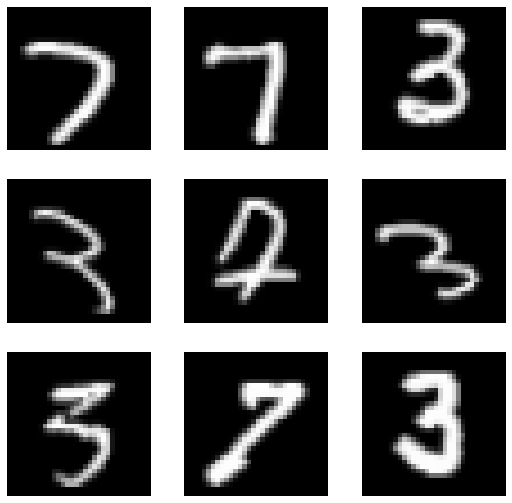

In [159]:
dls.show_batch()

### 2단계 

In [162]:
counterfeiter = basic_generator(32,n_channels=3,n_extra_layers=1)
police = basic_critic(32,n_channels=3,n_extra_layers=1)

In [163]:
lrnr = GANLearner.wgan(dls,counterfeiter,police) 

### 3단계

`-` lrnr.fit(10) 진행 

In [164]:
lrnr.fit(10)

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.532201,0.440801,0.440801,-0.726502,00:02
1,-0.572863,0.292201,0.292201,-0.762671,00:02
2,-0.580544,0.365955,0.365955,-0.764500,00:02
3,-0.578211,0.283310,0.283310,-0.760000,00:02
4,-0.574836,0.292477,0.292477,-0.760881,00:02
5,-0.559277,0.333989,0.333989,-0.720299,00:02
6,-0.477380,0.213629,0.213629,-0.643177,00:02
7,-0.531273,0.235818,0.235818,-0.432077,00:02
8,-0.551595,0.282958,0.282958,-0.723118,00:02
9,-0.494749,0.308528,0.308528,-0.711895,00:03


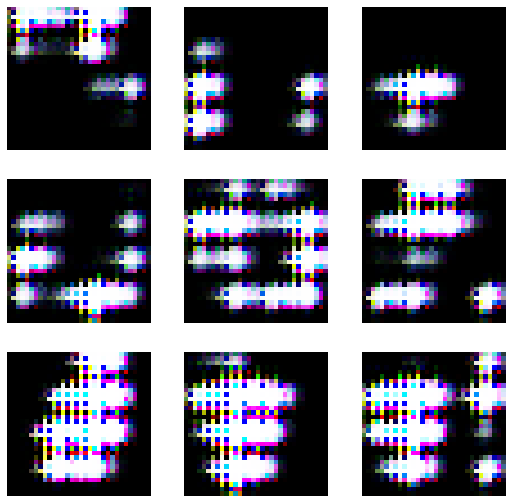

In [165]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총20회

In [166]:
lrnr.fit(10)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.419668,0.087052,0.087052,-0.237243,00:02
1,-0.543500,0.329471,0.329471,-0.734705,00:02
2,-0.529323,0.215306,0.215306,-0.719122,00:02
3,-0.533282,0.299712,0.299712,-0.719879,00:02
4,-0.492712,0.277884,0.277884,-0.696638,00:02
5,-0.524883,0.277088,0.277088,-0.720916,00:02
6,-0.543268,0.260537,0.260537,-0.726659,00:02
7,-0.436168,0.298683,0.298683,-0.533639,00:02
8,-0.398121,0.386021,0.386021,-0.575905,00:02
9,-0.473424,0.259428,0.259428,-0.680931,00:02


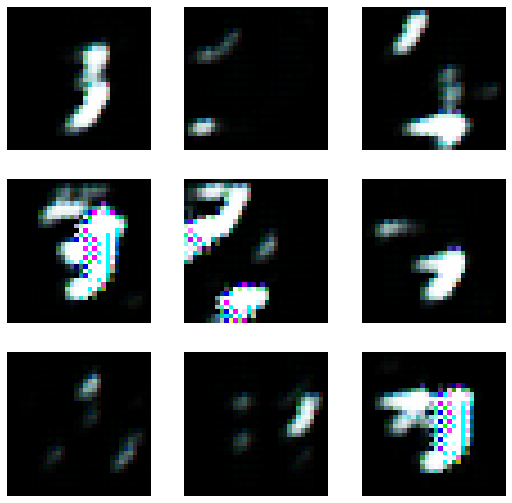

In [167]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총30회

In [168]:
lrnr.fit(10)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.460563,0.232739,0.232739,-0.672230,00:02
1,-0.444508,0.213786,0.213786,-0.622139,00:02
2,-0.388439,0.238852,0.238852,-0.307610,00:02
3,-0.426316,0.354313,0.354313,-0.563799,00:02
4,-0.414099,0.322855,0.322855,-0.595307,00:02
5,-0.388728,0.184913,0.184913,-0.584780,00:02
6,-0.370009,0.174675,0.174675,-0.578049,00:02
7,-0.351684,0.153075,0.153075,-0.500779,00:02
8,-0.272257,0.293494,0.293494,-0.026133,00:02
9,-0.147323,0.130281,0.130281,-0.062606,00:02


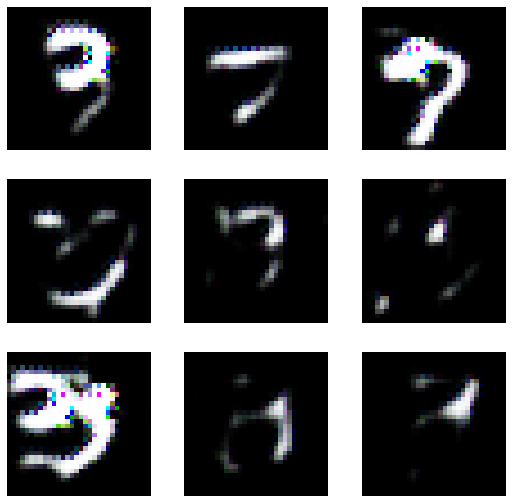

In [169]:
lrnr.show_results()

`-` lrnr.fit(30) 추가로 진행 // 총60회

In [170]:
lrnr.fit(30)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.266713,0.326697,0.326697,-0.360351,00:02
1,-0.204794,-0.024827,-0.024827,-0.078930,00:02
2,-0.182044,0.218660,0.218660,-0.217780,00:02
3,-0.159330,-0.333503,-0.333503,-0.023529,00:02
4,-0.175804,0.490546,0.490546,-0.316850,00:02
5,-0.060805,0.017926,0.017926,-0.039713,00:02
6,-0.157659,0.368752,0.368752,-0.572124,00:02
7,-0.014943,0.071575,0.071575,-0.003522,00:02
8,-0.066916,0.074913,0.074913,-0.086654,00:02
9,-0.044177,0.315838,0.315838,-0.045339,00:02


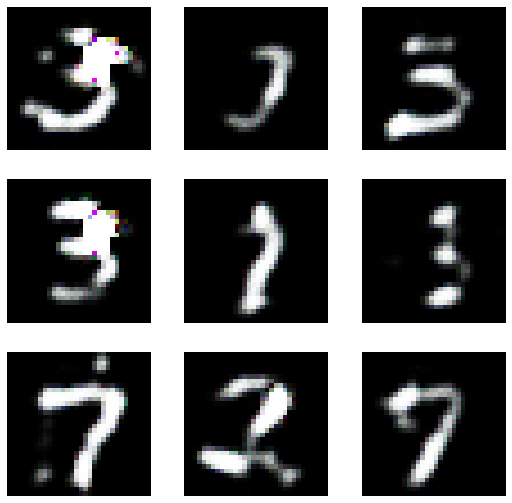

In [171]:
lrnr.show_results()

### 4단계 (없음)